<a href="https://colab.research.google.com/github/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/blob/main/t-SNE_molecular_fingerprints_for_fragments_RO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



In [1]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit
      pbar.update(25)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(50)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(75)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random

In [3]:
import rdkit
print(f"rdkit_version: {rdkit.__version__}")

rdkit_version: 2022.09.5


In [4]:
# Importar blibliotecas
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist

### 1. Load Fragments RO3 dataset

In [5]:
# LANaPDB RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LANaPDB_RO3_Moleculardescriptors.csv"
lanapdb = pd.read_csv(url_data)
lanapdb = lanapdb[["ID", "SMILES_chiral"]]
lanapdb["Database"] = "LANaPDB"
lanapdb.tail(2)

ID  \
1830  LANaPDB_fragments_73605   
1831  LANaPDB_fragments_74033   

                                          SMILES_chiral Database  
1830  CC1(C)[C@H]2CCC[C@]3(CO3)[C@]2(C)C[C@H](O)[C@]...  LANaPDB  
1831                                     CCC(C)=CC(=O)O  LANaPDB

In [6]:
# COCONUT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/COCONUT_RO3_Moleculardescriptors.csv"
coconut = pd.read_csv(url_data)
coconut = coconut[["ID", "SMILES_chiral","Database"]]
coconut.tail(2)

ID SMILES_chiral Database
38745  COCONUT_fragments_2583030  O=c1cco[nH]1  COCONUT
38746  COCONUT_fragments_2583083   O=CC1C=CCC1  COCONUT

In [7]:
# Enamine RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Enamine_RO3_Moleculardescriptors.csv"
Enamine = pd.read_csv(url_data)
Enamine = Enamine[["ID", "SMILES_chiral"]]
Enamine["Database"] = "Enamine"
Enamine.tail(2)

ID                 SMILES_chiral Database
8384  Z212848872  CC1CN(C(=O)Cc2cccc(F)c2)CCO1  Enamine
8385  Z228588126    CC(C(=O)N1CCCCCC1)N1CCNCC1  Enamine

In [8]:
# ChemDiv RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/ChemDiv_RO3_Moleculardescriptors.csv"
ChemDiv = pd.read_csv(url_data)
ChemDiv = ChemDiv[["ID", "SMILES_chiral","Database"]]
ChemDiv.tail(2)

ID                     SMILES_chiral Database
16721  BB01-0446  CC(C)N1CCC2(CC1)NC(=O)c1ccccc1O2  ChemDiv
16722  BB01-0451  CC(=O)N1C(C(=O)O)CSC1c1ccc(C)cc1  ChemDiv

In [9]:
# Maybridge RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Maybridge_RO3_Moleculardescriptors.csv"
Maybridge = pd.read_csv(url_data)
Maybridge = Maybridge[["ID", "SMILES_chiral", "Database"]]
Maybridge.tail(2)

ID                         SMILES_chiral   Database
5910   KM08807            O=C1CC2CCCC(C1)N2Cc1ccccc1  Maybridge
5911  SEW04324  O=C(c1ccccc1)C1CCN(C(=O)C(F)(F)F)CC1  Maybridge

In [10]:
# Life Chemicals RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LifeChemicals_RO3_Moleculardescriptors.csv"
LifeChemicals = pd.read_csv(url_data)
LifeChemicals = LifeChemicals[["ID", "SMILES_chiral"]]
LifeChemicals["Database"] = "Life Chemicals"
LifeChemicals.tail(2)

ID                           SMILES_chiral        Database
14732  F6782-0679   Cn1cc(C(=O)c2ccccc2)c(=O)c2cc(F)ccc21  Life Chemicals
14733  F0788-0005  c1cc[n+]2cc3n(c2c1)Cc1c[n+]2ccccc2n1C3  Life Chemicals

In [11]:
# CRAFT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/CRAFT_RO3_Moleculardescriptors.csv"
CRAFT = pd.read_csv(url_data)
CRAFT = CRAFT[["ID", "SMILES_chiral", "Database"]]
CRAFT.tail(2)

ID                      SMILES_chiral Database
174  QHM-0000005          O=C1C=C(Cl)C(=O)c2ccccc21    CRAFT
175  QHM-0000002  CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O    CRAFT

In [12]:
DATA = pd.concat([coconut, LifeChemicals, Enamine, ChemDiv, Maybridge, lanapdb, CRAFT])
DATA.head(2)

ID SMILES_chiral Database
0  COCONUT_fragments_1          CC=O  COCONUT
1  COCONUT_fragments_2          CCCO  COCONUT

In [13]:
DATA

ID                        SMILES_chiral Database
0    COCONUT_fragments_1                                 CC=O  COCONUT
1    COCONUT_fragments_2                                 CCCO  COCONUT
2    COCONUT_fragments_3                                    O  COCONUT
3    COCONUT_fragments_4                               CC(C)O  COCONUT
4    COCONUT_fragments_6                         C[C@@H](O)CO  COCONUT
..                   ...                                  ...      ...
171          QHM-0000026       Cc1c(O)c2ccccc2c2[nH]c(=N)sc12    CRAFT
172          QHM-0000024        N=c1[nH]c2c(cc(O)c3ccccc32)s1    CRAFT
173          QHM-0000014  Cc1cc(C)n2c1C=C1C=CC=[N+]1[B-]2(F)F    CRAFT
174          QHM-0000005            O=C1C=C(Cl)C(=O)c2ccccc21    CRAFT
175          QHM-0000002    CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O    CRAFT

[86510 rows x 3 columns]

In [14]:
set(list(DATA["Database"]))

{'COCONUT',
 'CRAFT',
 'ChemDiv',
 'Enamine',
 'LANaPDB',
 'Life Chemicals',
 'Maybridge'}

### MACCS keys

---



In [15]:
# Check for invalid SMILES strings
data1 = DATA.copy()
#DATA = 0
invalid_smiles = [x for x in data1['SMILES_chiral'] if Chem.MolFromSmiles(x) is None]

# Print the invalid SMILES strings
print(f"Invalid SMILES strings: {invalid_smiles}")

# Remove the invalid SMILES strings from the DataFrame
data1 = data1[~data1['SMILES_chiral'].isin(invalid_smiles)]

# Recalculate the MACCS keys
fps = [[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in data1['SMILES_chiral']]
fps = pd.DataFrame([np.array(x) for x in fps])
fps

Invalid SMILES strings: []


0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    1    0    1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
86505    0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
86506    0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
86507    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
86508    0    0    0    0    0    0    0    0    0    0  ...    0    0    1   
86509    0    0    0    0    0    0    0    0    0    0  ...    1    0    1   

       160  161  162  163  164  165  166  
0        1    0    0    0    1    0    0  
1        1    0    0    0    1    0    0  
2        0    0    0    0    1    0    0  
3        1    0    0    0    1    0    0  
4        1    0    0    0    1    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
86505    1    1    1    1    1    1    0  
86506    0    1    1    1    1    1    0  
86507    1    1    1    1    0    1    0  
86508    0    0    1    1    1    1    0  
86509    1    0    1    1    1    1    0  

[86510 rows x 167 columns]

In [16]:
# Training t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = fps
#data_tsne = data_tsne.drop(labels = ["Data set", "ID","SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 86510 samples in 0.167s...
[t-SNE] Computed neighbors for 86510 samples in 144.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86510
[t-SNE] Computed conditional probabilities for sample 2000 / 86510
[t-SNE] Computed conditional probabilities for sample 3000 / 86510
[t-SNE] Computed conditional probabilities for sample 4000 / 86510
[t-SNE] Computed conditional probabilities for sample 5000 / 86510
[t-SNE] Computed conditional probabilities for sample 6000 / 86510
[t-SNE] Computed conditional probabilities for sample 7000 / 86510
[t-SNE] Computed conditional probabilities for sample 8000 / 86510
[t-SNE] Computed conditional probabilities for sample 9000 / 86510
[t-SNE] Computed conditional probabilities for sample 10000 / 86510
[t-SNE] Computed conditional probabilities for sample 11000 / 86510
[t-SNE] Computed conditional probabilities for sample 12000 / 86510
[t-SNE] Computed conditional probabilities for 

array([[-0.5378317,  7.849867 ],
       [-3.050721 ,  7.7822294],
       [-0.5854292,  7.787702 ],
       ...,
       [-5.4083447, 12.2958355],
       [-4.3679934,  4.090926 ],
       [-6.498103 , -9.495824 ]], dtype=float32)

In [17]:
# Choosing complentary information
label = data1[["ID",'SMILES_chiral', 'Database']]
label = label.to_numpy()
print(label.shape)
# Concat arrays
arr = np.concatenate((label, tsne_results), axis = 1)
print(arr.shape)
# New dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['ID','SMILES_chiral','Database','axis 1', 'axis 2'] )
tsne_dataset

(86510, 3)
(86510, 5)


ID                        SMILES_chiral Database  \
0      COCONUT_fragments_1                                 CC=O  COCONUT   
1      COCONUT_fragments_2                                 CCCO  COCONUT   
2      COCONUT_fragments_3                                    O  COCONUT   
3      COCONUT_fragments_4                               CC(C)O  COCONUT   
4      COCONUT_fragments_6                         C[C@@H](O)CO  COCONUT   
...                    ...                                  ...      ...   
86505          QHM-0000026       Cc1c(O)c2ccccc2c2[nH]c(=N)sc12    CRAFT   
86506          QHM-0000024        N=c1[nH]c2c(cc(O)c3ccccc32)s1    CRAFT   
86507          QHM-0000014  Cc1cc(C)n2c1C=C1C=CC=[N+]1[B-]2(F)F    CRAFT   
86508          QHM-0000005            O=C1C=C(Cl)C(=O)c2ccccc21    CRAFT   
86509          QHM-0000002    CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O    CRAFT   

         axis 1     axis 2  
0     -0.537832   7.849867  
1     -3.050721   7.782229  
2     -0.585429   7.787702  
3     -1.059842    8.61939  
4     -4.652653   8.598827  
...         ...        ...  
86505   6.92359   6.020355  
86506  6.917741   6.019144  
86507 -5.408345  12.295835  
86508 -4.367993   4.090926  
86509 -6.498103  -9.495824  

[86510 rows x 5 columns]

In [18]:
tsne_dataset.to_csv("tsne_dataset.csv", sep=",", index=False)

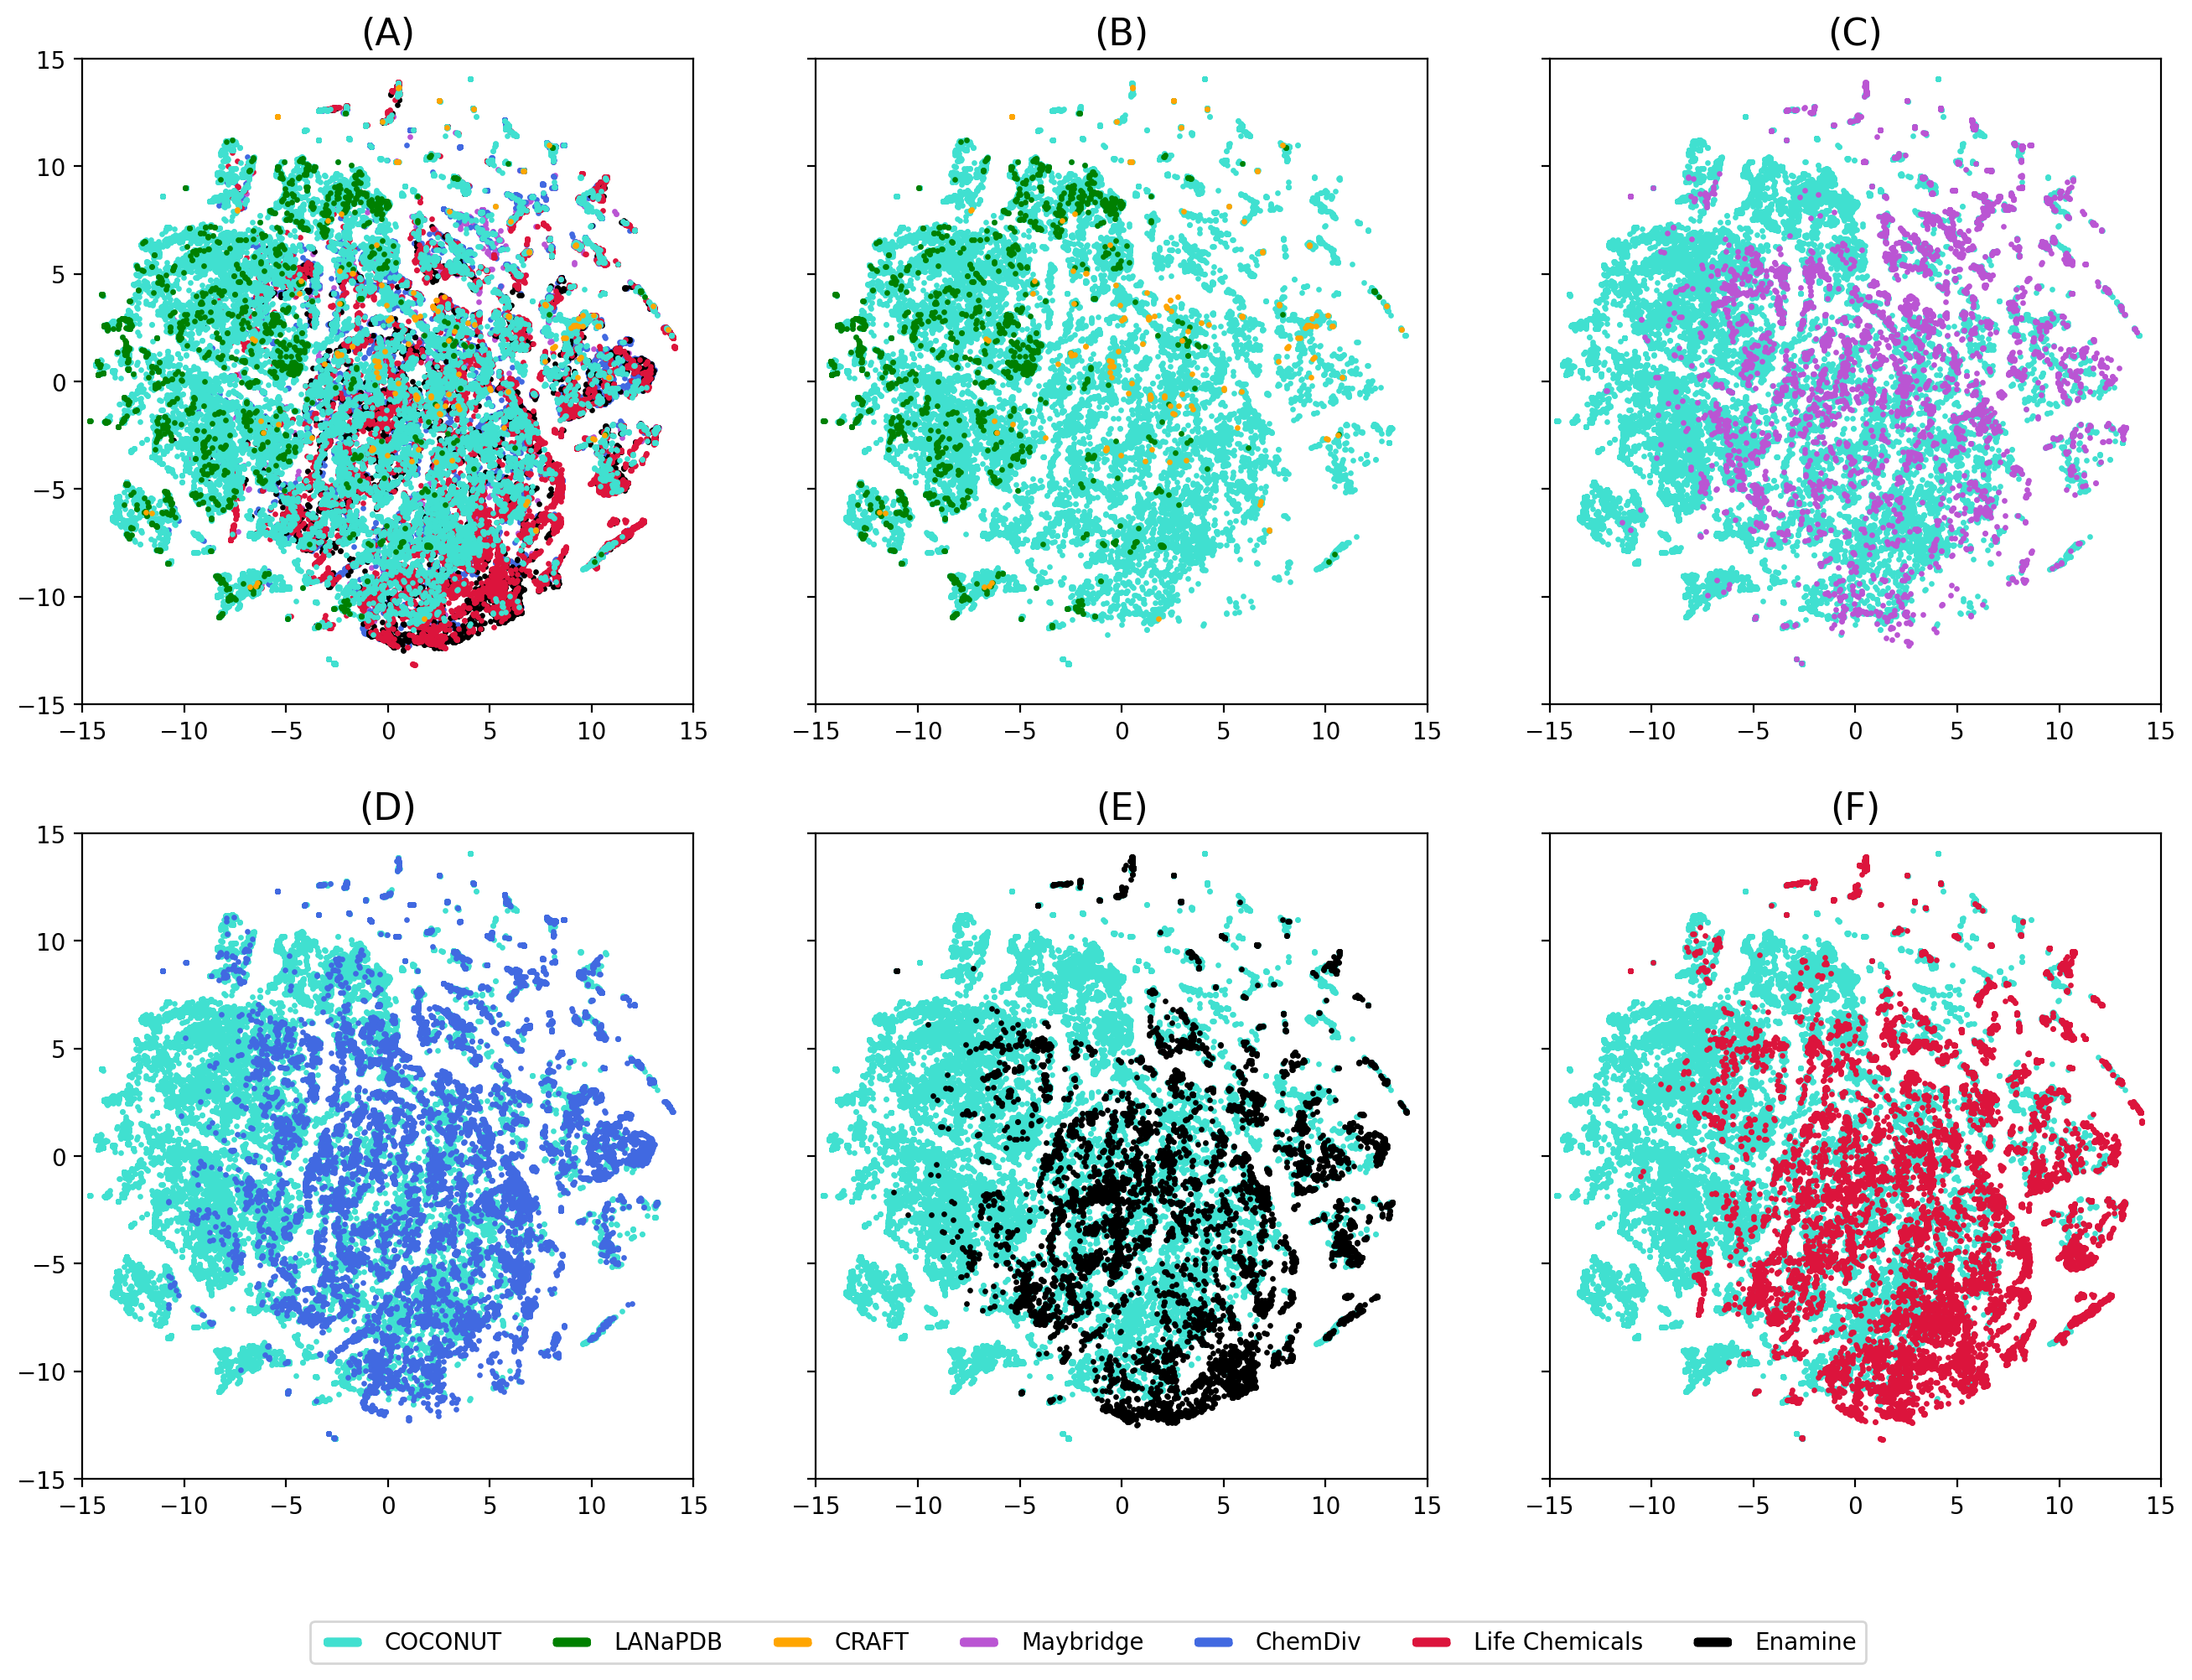

In [19]:
import matplotlib.pyplot as plt
FinalSet=tsne_dataset.copy()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots (2,3, figsize=(16,11), dpi=200, sharey=True)

D=ax1.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")
E=ax1.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")
G=ax1.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")
F=ax1.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")
A=ax1.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
B=ax1.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
C=ax1.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax2.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax2.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
ax2.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax3.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax3.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")

ax4.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax4.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")

ax5.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax5.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")

ax6.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax6.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")

ax1.set_title("(A)", fontsize=16)
ax2.set_title("(B)", fontsize=16)
ax3.set_title("(C)", fontsize=16)
ax4.set_title("(D)", fontsize=16)
ax5.set_title("(E)", fontsize=16)
ax6.set_title("(F)", fontsize=16)

ax1.set_xlim(-15,15)
ax2.set_xlim(-15,15)
ax3.set_xlim(-15,15)
ax4.set_xlim(-15,15)
ax5.set_xlim(-15,15)
ax6.set_xlim(-15,15)

ax1.set_ylim(-15, 15)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

fig.legend((A,B, C, D, E, F, G ),("COCONUT", "LANaPDB", "CRAFT", "Maybridge", 'ChemDiv',"Life Chemicals", "Enamine"),
           loc="lower center", bbox_to_anchor=(0.5, 0.01), borderaxespad=0,
           scatterpoints=400,
           ncol=7,
           fontsize=10)

plt.show()
fig.savefig("TSNE_Fragments_RO3_MACCSkeys.jpg", bbox_inches='tight', pad_inches=0)

In [20]:
# Graficar
import plotly.express as px
import molplotly
from dash import Dash, dcc, html

color = [
         "turquoise", #COCONUT
         "crimson", #Life Chemicals
         "black", #Enamine
         "royalblue", #ChemDiv
         "mediumorchid", #Maybridge
         "green", #LANaPDB
         "orange", #CRAFT
        ]
fig_tsne = px.scatter(tsne_dataset,
                            x='axis 1',
                            y='axis 2',
                            color= "Database",
                            color_continuous_scale= "viridis",
                            color_discrete_sequence= color,
                            title='t-SNE MACCs keys',
                            labels={'Axis 1': 'axis 1',
                                    'Axis 2': 'axis 2'},
                            width=600,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_tsne,
                                         df=tsne_dataset,
                                         smiles_col='SMILES_chiral',
                                         title_col='ID',
                                         color_col="Database", #'Data_set_LOGBB_EXP'
                                        )
app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

## Morgan2

---



In [21]:
# Check for invalid SMILES strings
invalid_smiles = [x for x in data1['SMILES_chiral'] if Chem.MolFromSmiles(x) is None]

# Print the invalid SMILES strings
print(f"Invalid SMILES strings: {invalid_smiles}")

# Remove the invalid SMILES strings from the DataFrame
data1 = data1[~data1['SMILES_chiral'].isin(invalid_smiles)]

# Recalculate the Morgan2
fps = [[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=1024).ToBitString()] for x in data1['SMILES_chiral']]
fps = pd.DataFrame([np.array(x) for x in fps])
fps

Invalid SMILES strings: []


0     1     2     3     4     5     6     7     8     9     ...  1014  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     1     0     0     0     0     0     0     0     0  ...     0   
4         0     1     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
86505     0     0     0     0     0     0     0     0     0     0  ...     0   
86506     0     0     0     0     0     0     0     0     0     0  ...     0   
86507     0     0     0     0     0     0     0     0     0     0  ...     0   
86508     0     1     0     0     0     0     0     0     0     0  ...     0   
86509     0     1     0     0     0     0     0     0     0     0  ...     0   

       1015  1016  1017  1018  1019  1020  1021  1022  1023  
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
86505     0     0     0     0     0     0     1     0     0  
86506     0     0     0     0     0     0     0     0     0  
86507     0     0     0     0     0     0     0     0     0  
86508     0     0     0     0     0     0     0     0     0  
86509     0     0     0     0     0     0     0     0     0  

[86510 rows x 1024 columns]

In [22]:
# Training modelo t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = fps
#data_tsne = data_tsne.drop(labels = ["Data set", "ID","SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 86510 samples in 1.145s...
[t-SNE] Computed neighbors for 86510 samples in 693.489s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86510
[t-SNE] Computed conditional probabilities for sample 2000 / 86510
[t-SNE] Computed conditional probabilities for sample 3000 / 86510
[t-SNE] Computed conditional probabilities for sample 4000 / 86510
[t-SNE] Computed conditional probabilities for sample 5000 / 86510
[t-SNE] Computed conditional probabilities for sample 6000 / 86510
[t-SNE] Computed conditional probabilities for sample 7000 / 86510
[t-SNE] Computed conditional probabilities for sample 8000 / 86510
[t-SNE] Computed conditional probabilities for sample 9000 / 86510
[t-SNE] Computed conditional probabilities for sample 10000 / 86510
[t-SNE] Computed conditional probabilities for sample 11000 / 86510
[t-SNE] Computed conditional probabilities for sample 12000 / 86510
[t-SNE] Computed conditional probabilities for 

array([[  -5.2809706 ,    0.52554435],
       [  -3.4822528 ,    1.6387684 ],
       [ -14.617097  , -334.34692   ],
       ...,
       [  -6.3190064 ,   -2.5835094 ],
       [  -5.812154  ,   -4.5843635 ],
       [  -3.4596992 ,   -3.387005  ]], dtype=float32)

In [23]:
# Choosing complentary information
label = data1[["ID",'SMILES_chiral', 'Database']]
label = label.to_numpy()
print(label.shape)
# Concat arrays
arr = np.concatenate((label, tsne_results), axis = 1)
print(arr.shape)
# New Dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['ID','SMILES_chiral', 'Database','axis 1', 'axis 2'] )
tsne_dataset

(86510, 3)
(86510, 5)


ID                        SMILES_chiral Database  \
0      COCONUT_fragments_1                                 CC=O  COCONUT   
1      COCONUT_fragments_2                                 CCCO  COCONUT   
2      COCONUT_fragments_3                                    O  COCONUT   
3      COCONUT_fragments_4                               CC(C)O  COCONUT   
4      COCONUT_fragments_6                         C[C@@H](O)CO  COCONUT   
...                    ...                                  ...      ...   
86505          QHM-0000026       Cc1c(O)c2ccccc2c2[nH]c(=N)sc12    CRAFT   
86506          QHM-0000024        N=c1[nH]c2c(cc(O)c3ccccc32)s1    CRAFT   
86507          QHM-0000014  Cc1cc(C)n2c1C=C1C=CC=[N+]1[B-]2(F)F    CRAFT   
86508          QHM-0000005            O=C1C=C(Cl)C(=O)c2ccccc21    CRAFT   
86509          QHM-0000002    CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O    CRAFT   

          axis 1      axis 2  
0      -5.280971    0.525544  
1      -3.482253    1.638768  
2     -14.617097 -334.346924  
3     -17.734364 -168.107162  
4      -3.015976   -2.010289  
...          ...         ...  
86505   2.430893   11.571754  
86506   2.521362   11.868582  
86507  -6.319006   -2.583509  
86508  -5.812154   -4.584363  
86509  -3.459699   -3.387005  

[86510 rows x 5 columns]

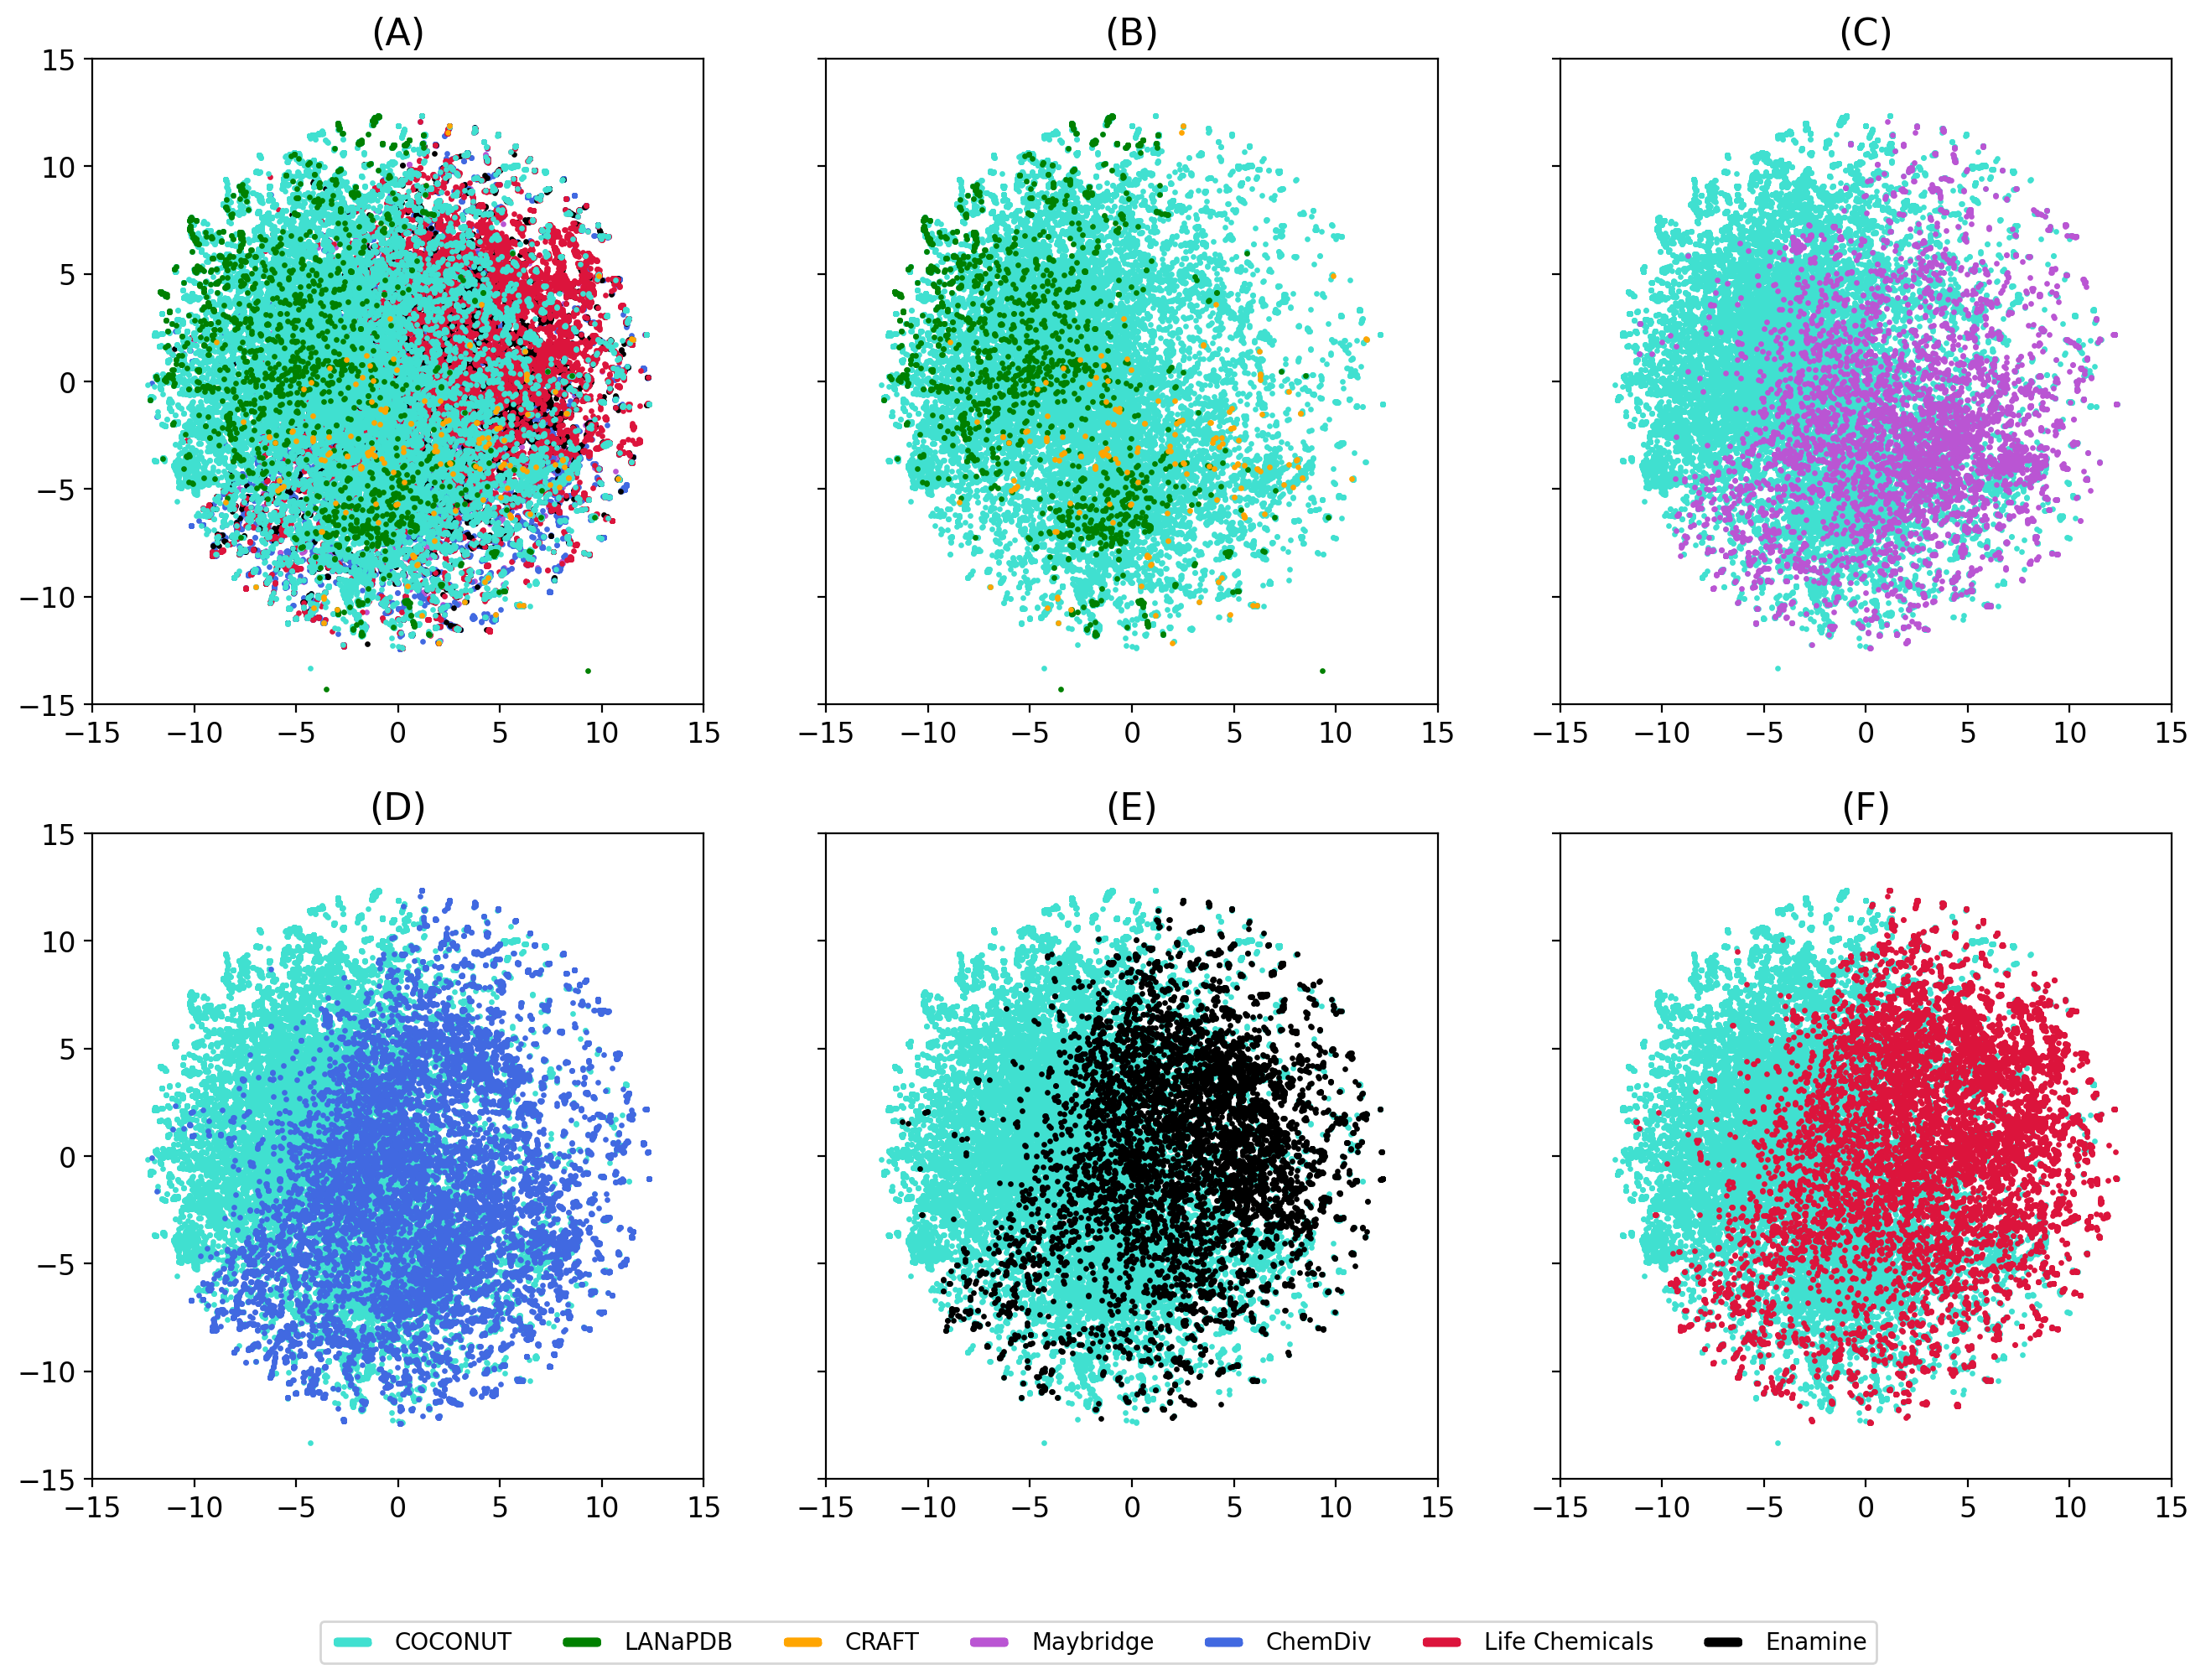

In [24]:
import matplotlib.pyplot as plt
FinalSet=tsne_dataset.copy()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots (2,3, figsize=(16,11), dpi=200, sharey=True)

D=ax1.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")
E=ax1.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")
G=ax1.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")
F=ax1.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")
A=ax1.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
B=ax1.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
C=ax1.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax2.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax2.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
ax2.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax3.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax3.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")

ax4.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax4.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")

ax5.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax5.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")

ax6.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax6.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")

ax1.set_title("(A)", fontsize=16)
ax2.set_title("(B)", fontsize=16)
ax3.set_title("(C)", fontsize=16)
ax4.set_title("(D)", fontsize=16)
ax5.set_title("(E)", fontsize=16)
ax6.set_title("(F)", fontsize=16)

ax1.set_xlim(-15,15)
ax2.set_xlim(-15,15)
ax3.set_xlim(-15,15)
ax4.set_xlim(-15,15)
ax5.set_xlim(-15,15)
ax6.set_xlim(-15,15)

ax1.set_ylim(-15, 15)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

fig.legend((A,B, C, D, E, F, G ),("COCONUT", "LANaPDB", "CRAFT", "Maybridge", 'ChemDiv',"Life Chemicals", "Enamine"),
           loc="lower center", bbox_to_anchor=(0.5, 0.01), borderaxespad=0,
           scatterpoints=400,
           ncol=7,
           fontsize=10)
plt.show()
fig.savefig("TSNE_Fragments_RO3_Morgan2.jpg", bbox_inches='tight', pad_inches=0)

In [25]:
# Graficar
import plotly.express as px
import molplotly
from dash import Dash, dcc, html

color = [
         "turquoise", #COCONUT
         "crimson", #Life Chemicals
         "black", #Enamine
         "royalblue", #ChemDiv
         "mediumorchid", #Maybridge
         "green", #LANaPDB
         "orange", #CRAFT
        ]
fig_tsne = px.scatter(tsne_dataset,
                            x='axis 1',
                            y='axis 2',
                            color= "Database",
                            color_continuous_scale= "viridis",
                            color_discrete_sequence= color,
                            title='t-SNE Morgan2',
                            labels={'Axis 1': 'axis 1',
                                    'Axis 2': 'axis 2'},
                            width=600,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_tsne,
                                         df=tsne_dataset,
                                         smiles_col='SMILES_chiral',
                                         title_col='ID',
                                         color_col="Database", #'Data_set_LOGBB_EXP'
                                        )
#fig_tsne.show()
app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

### Morgan3

---



In [26]:
# Check for invalid SMILES strings
invalid_smiles = [x for x in data1['SMILES_chiral'] if Chem.MolFromSmiles(x) is None]

# Print the invalid SMILES strings
print(f"Invalid SMILES strings: {invalid_smiles}")

# Remove the invalid SMILES strings from the DataFrame
data1 = data1[~data1['SMILES_chiral'].isin(invalid_smiles)]

# Recalculate the Morgan2
fps = [[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 3, nBits=1024).ToBitString()] for x in data1['SMILES_chiral']]
fps = pd.DataFrame([np.array(x) for x in fps])
fps

Invalid SMILES strings: []


0     1     2     3     4     5     6     7     8     9     ...  1014  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     1     0     0     0     0     0     0     0     0  ...     0   
4         0     1     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
86505     0     0     0     0     0     0     0     0     0     0  ...     0   
86506     0     0     0     0     0     0     0     0     0     0  ...     0   
86507     0     0     0     0     0     0     0     0     0     0  ...     0   
86508     0     1     0     0     0     0     0     0     0     0  ...     0   
86509     0     1     0     0     0     0     0     0     0     0  ...     0   

       1015  1016  1017  1018  1019  1020  1021  1022  1023  
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
86505     0     0     0     0     0     0     1     0     0  
86506     0     0     0     0     0     0     0     0     1  
86507     0     0     0     0     0     0     0     0     0  
86508     0     0     0     0     0     0     0     0     0  
86509     0     0     0     0     0     0     0     0     0  

[86510 rows x 1024 columns]

In [27]:
# Training t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = fps
#data_tsne = data_tsne.drop(labels = ["Data set", "ID","SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 86510 samples in 1.033s...
[t-SNE] Computed neighbors for 86510 samples in 651.559s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86510
[t-SNE] Computed conditional probabilities for sample 2000 / 86510
[t-SNE] Computed conditional probabilities for sample 3000 / 86510
[t-SNE] Computed conditional probabilities for sample 4000 / 86510
[t-SNE] Computed conditional probabilities for sample 5000 / 86510
[t-SNE] Computed conditional probabilities for sample 6000 / 86510
[t-SNE] Computed conditional probabilities for sample 7000 / 86510
[t-SNE] Computed conditional probabilities for sample 8000 / 86510
[t-SNE] Computed conditional probabilities for sample 9000 / 86510
[t-SNE] Computed conditional probabilities for sample 10000 / 86510
[t-SNE] Computed conditional probabilities for sample 11000 / 86510
[t-SNE] Computed conditional probabilities for sample 12000 / 86510
[t-SNE] Computed conditional probabilities for 

array([[ -3.2125473 ,  -3.0083468 ],
       [ -2.7133946 ,  -0.7590674 ],
       [110.246735  ,   0.36435243],
       ...,
       [ -3.540268  ,  -0.22839105],
       [ -3.297386  ,  -7.3280325 ],
       [ -3.0823822 ,  -6.9564624 ]], dtype=float32)

In [28]:
# choosing complentary information
label = data1[["ID",'SMILES_chiral', 'Database']]
label = label.to_numpy()
print(label.shape)
# Concat arrays
arr = np.concatenate((label, tsne_results), axis = 1)
print(arr.shape)
# New Dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['ID','SMILES_chiral', 'Database','axis 1', 'axis 2'] )
tsne_dataset

(86510, 3)
(86510, 5)


ID                        SMILES_chiral Database  \
0      COCONUT_fragments_1                                 CC=O  COCONUT   
1      COCONUT_fragments_2                                 CCCO  COCONUT   
2      COCONUT_fragments_3                                    O  COCONUT   
3      COCONUT_fragments_4                               CC(C)O  COCONUT   
4      COCONUT_fragments_6                         C[C@@H](O)CO  COCONUT   
...                    ...                                  ...      ...   
86505          QHM-0000026       Cc1c(O)c2ccccc2c2[nH]c(=N)sc12    CRAFT   
86506          QHM-0000024        N=c1[nH]c2c(cc(O)c3ccccc32)s1    CRAFT   
86507          QHM-0000014  Cc1cc(C)n2c1C=C1C=CC=[N+]1[B-]2(F)F    CRAFT   
86508          QHM-0000005            O=C1C=C(Cl)C(=O)c2ccccc21    CRAFT   
86509          QHM-0000002    CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O    CRAFT   

           axis 1      axis 2  
0       -3.212547   -3.008347  
1       -2.713395   -0.759067  
2      110.246735    0.364352  
3       68.222633 -212.230255  
4       -1.485234   -3.186888  
...           ...         ...  
86505   -3.750466   -6.029853  
86506    3.849065  -10.503654  
86507   -3.540268   -0.228391  
86508   -3.297386   -7.328032  
86509   -3.082382   -6.956462  

[86510 rows x 5 columns]

In [29]:
set(list(tsne_dataset["Database"]))

{'COCONUT',
 'CRAFT',
 'ChemDiv',
 'Enamine',
 'LANaPDB',
 'Life Chemicals',
 'Maybridge'}

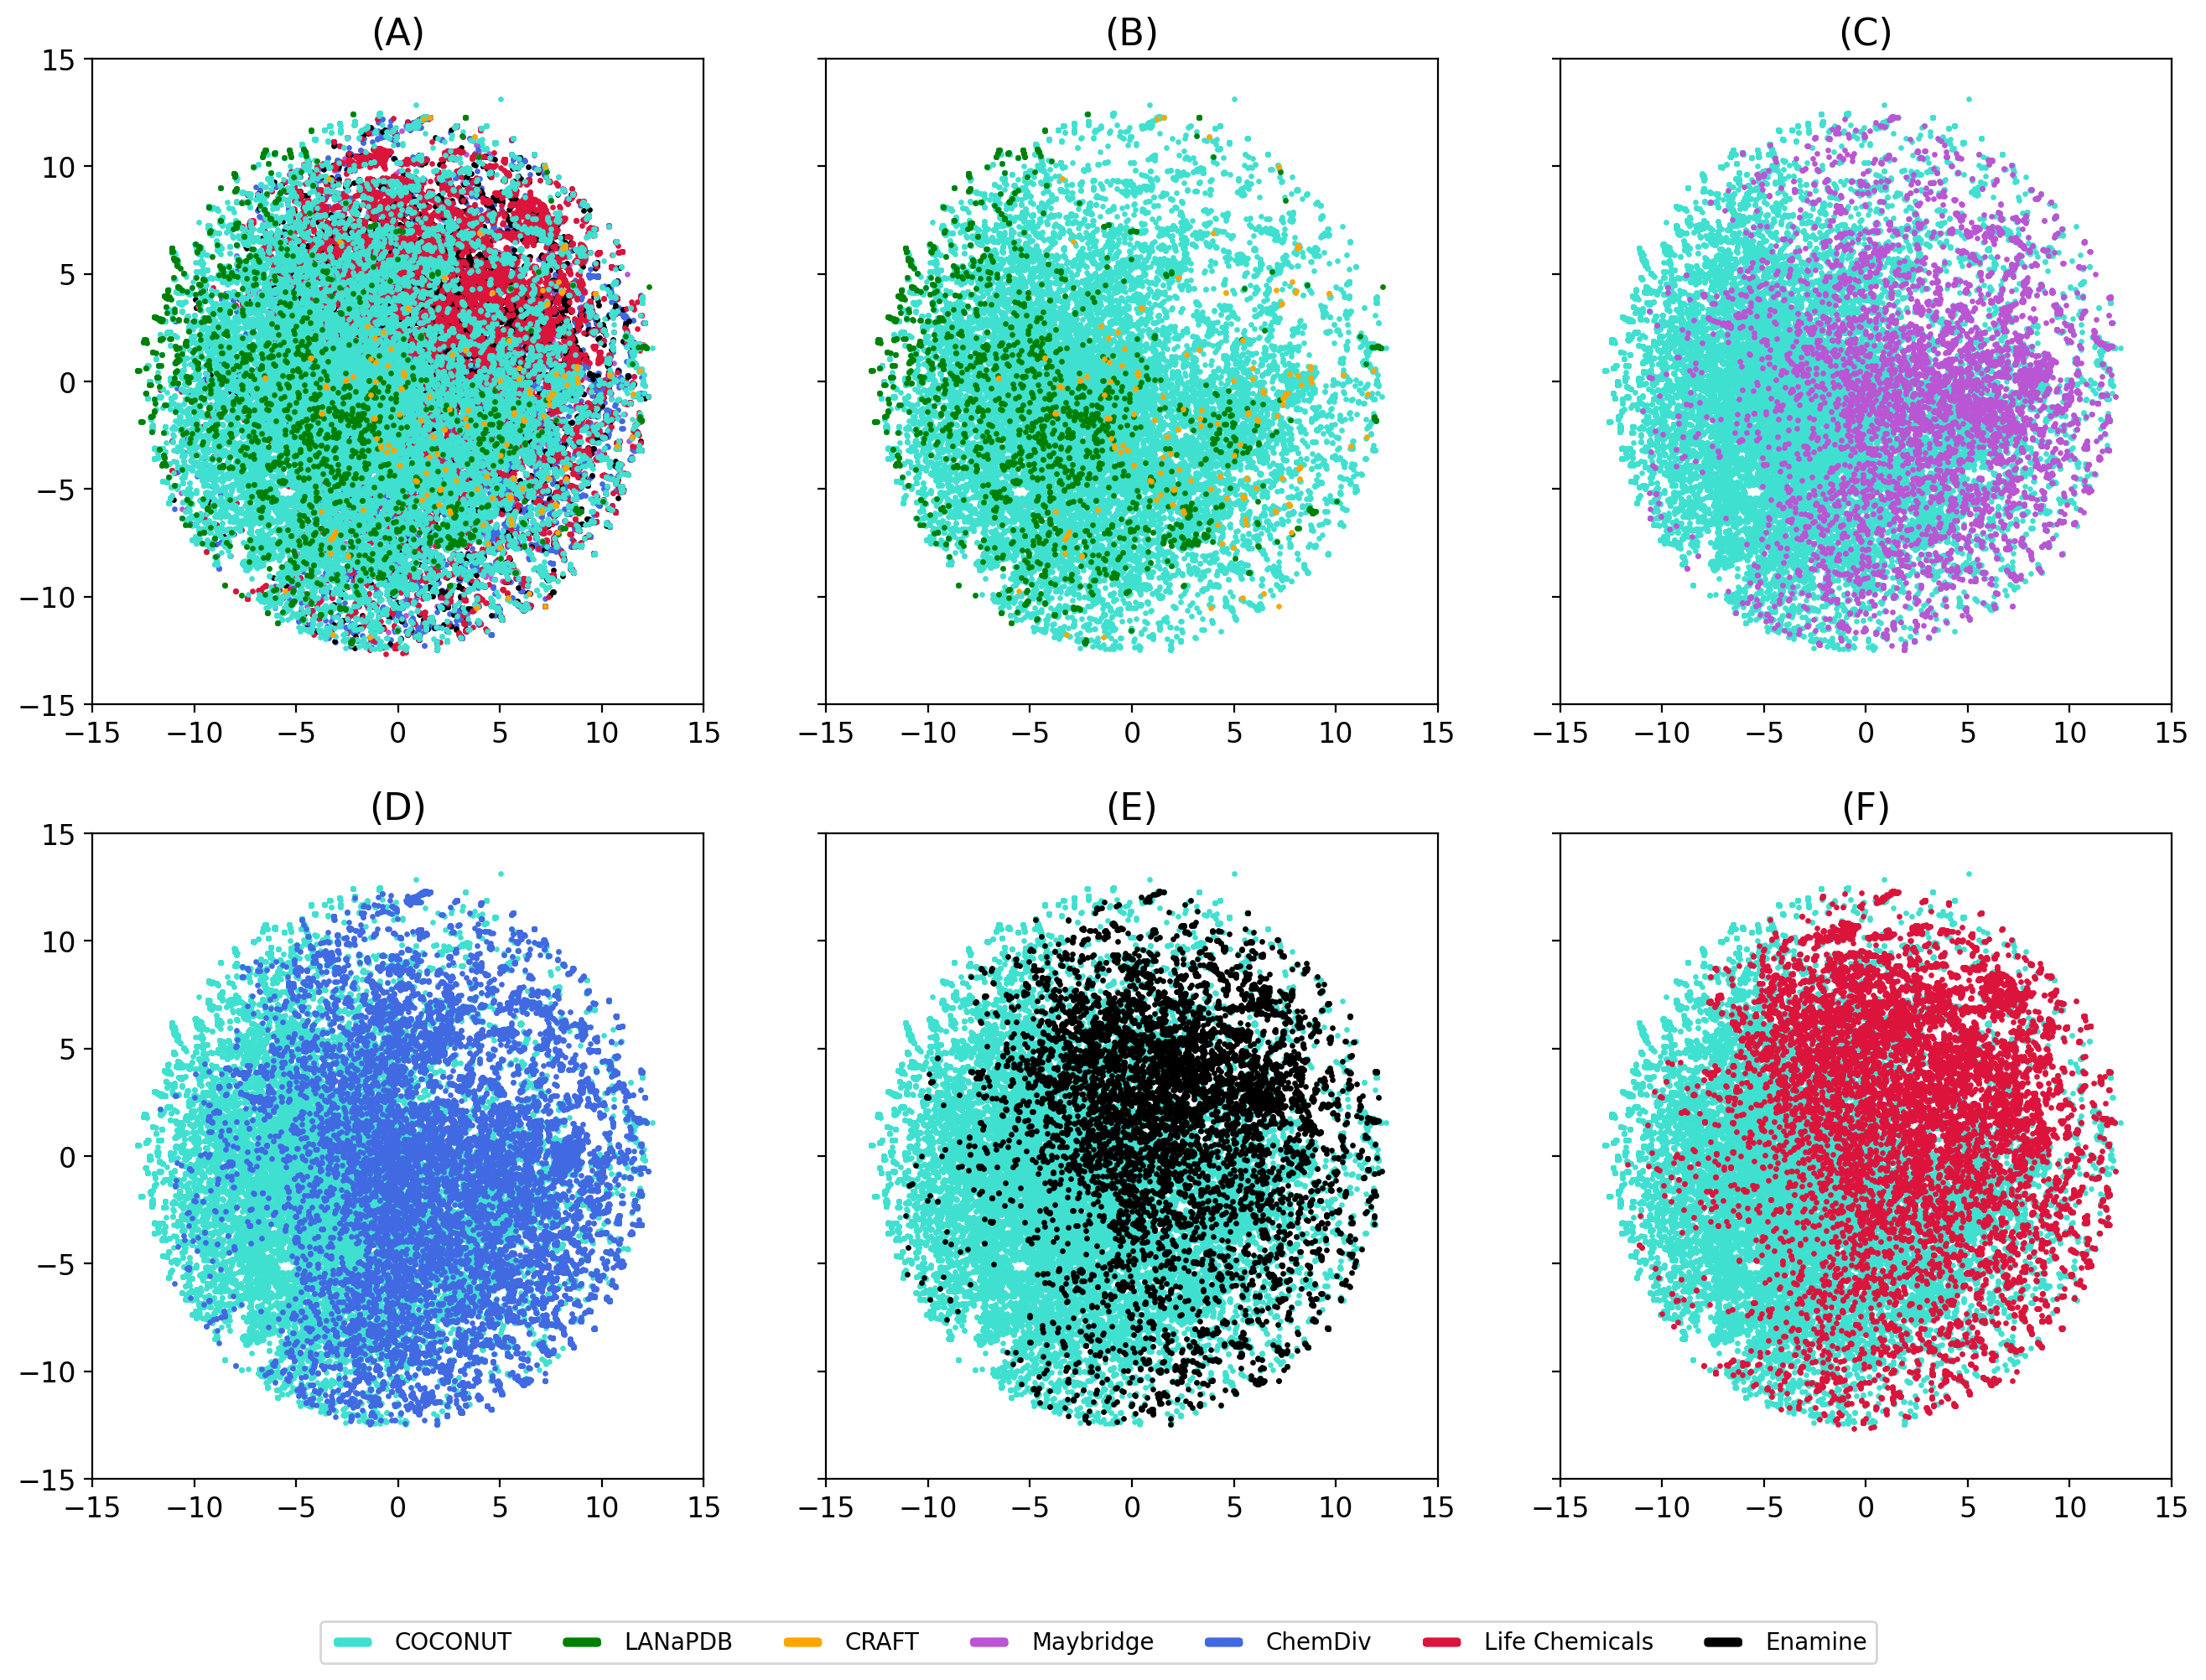

In [30]:
import matplotlib.pyplot as plt
FinalSet=tsne_dataset.copy()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots (2,3, figsize=(16,11), dpi=200, sharey=True)

D=ax1.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")
E=ax1.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")
G=ax1.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")
F=ax1.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")
A=ax1.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
B=ax1.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
C=ax1.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax2.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax2.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 1"], FinalSet[FinalSet["Database"] == "LANaPDB"]["axis 2"], s=2, c="green")
ax2.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["axis 1"], FinalSet[FinalSet["Database"] == "CRAFT"]["axis 2"], s=2, c="orange")

ax3.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax3.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["axis 1"], FinalSet[FinalSet["Database"] == "Maybridge"]["axis 2"], s=2, c="mediumorchid")

ax4.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax4.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 1"], FinalSet[FinalSet["Database"] == "ChemDiv"]["axis 2"], s=2, c="royalblue")

ax5.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax5.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["axis 1"], FinalSet[FinalSet["Database"] == "Enamine"]["axis 2"], s=2, c="black")

ax6.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["axis 1"], FinalSet[FinalSet["Database"] == "COCONUT"]["axis 2"], s=2, c="turquoise")
ax6.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 1"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["axis 2"], s=2, c="crimson")

ax1.set_title("(A)", fontsize=16)
ax2.set_title("(B)", fontsize=16)
ax3.set_title("(C)", fontsize=16)
ax4.set_title("(D)", fontsize=16)
ax5.set_title("(E)", fontsize=16)
ax6.set_title("(F)", fontsize=16)

ax1.set_xlim(-15,15)
ax2.set_xlim(-15,15)
ax3.set_xlim(-15,15)
ax4.set_xlim(-15,15)
ax5.set_xlim(-15,15)
ax6.set_xlim(-15,15)

ax1.set_ylim(-15, 15)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

fig.legend((A,B, C, D, E, F, G ),("COCONUT", "LANaPDB", "CRAFT", "Maybridge", 'ChemDiv',"Life Chemicals", "Enamine"),
           loc="lower center", bbox_to_anchor=(0.5, 0.01), borderaxespad=0,
           scatterpoints=400,
           ncol=7,
           fontsize=10)
plt.show()
fig.savefig("TSNE_Fragments_RO3_Morgan3.jpg", bbox_inches='tight', pad_inches=0)